In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def add_pitch_roll(df):
    df['pitch'] = np.degrees(np.arctan2(df.acc_x, np.sqrt(df.acc_y**2 + df.acc_z**2)))
    df['roll'] = np.degrees(np.arctan2(-df.acc_y, -df.acc_z))

In [3]:
def calib_stats(df):
    x_range = df.mag_x.max() - df.mag_x.min()
    x_midpt = (df.mag_x.max() + df.mag_x.min()) / 2
    y_range = df.mag_y.max() - df.mag_y.min()
    y_midpt = (df.mag_y.max() + df.mag_y.min()) / 2
    print('x midpt', x_midpt, 'range', x_range)
    print('y midpt', y_midpt, 'range', y_range)

In [4]:
def plot_calib_waltz(df):
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(14, 4))
    df.plot(x='mag_x', y='mag_y', xlim=(df.mag_x.min() - 100, df.mag_x.max() + 100), ax=ax0, legend=False)
    ax0.set_ylabel('mag y')
    
    df.plot(y='pitch', ax=ax1)
    df.plot(y='roll', ax=ax1)
    ax1.hlines(0, 0, len(df), linestyles='dotted')
    ax1.set_ylim(-30, 30)
    
    df.plot(y='mag_z', ax=ax2, legend=False)
    ax2.set_title('mag z')
    
    #fig.tight_layout()
    return fig, (ax0, ax1, ax2)

These two calibration waltzes were in building 176, near the lifts. The x-y magnetic field readings are very messy.

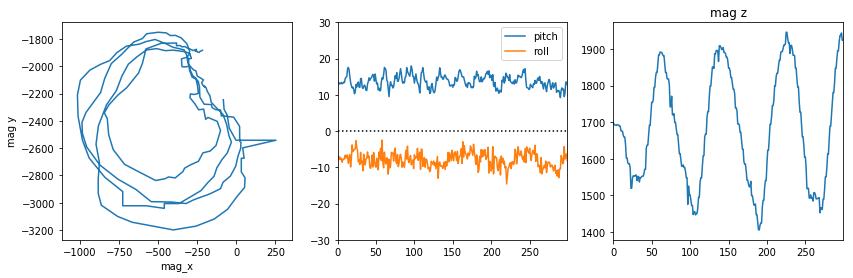

In [5]:
waltz1 = pd.read_csv('../recorded_data/calibration_level_B176_2017-06-27.csv')
add_pitch_roll(waltz1)
fig, (a0, a1, a2) = plot_calib_waltz(waltz1);

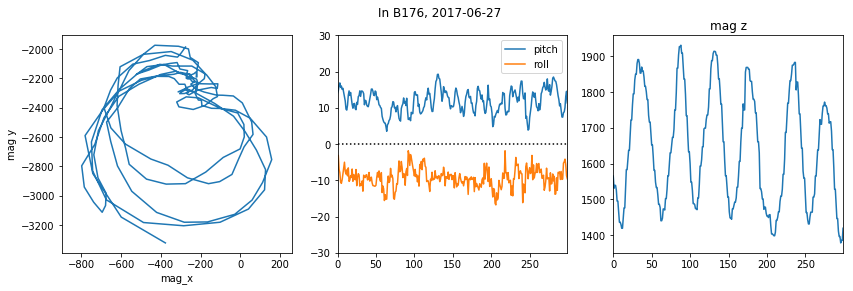

In [6]:
waltz2 = pd.read_csv('../recorded_data/calibration_level_B176_2017-06-27b.csv')
add_pitch_roll(waltz2)
fig, axes = plot_calib_waltz(waltz2);
fig.suptitle('In B176, 2017-06-27')
#fig.savefig('messy_calib.png')

This one is from Eastleigh lakes, and the x-y field readings are much cleaner. We only did two rotations, though.

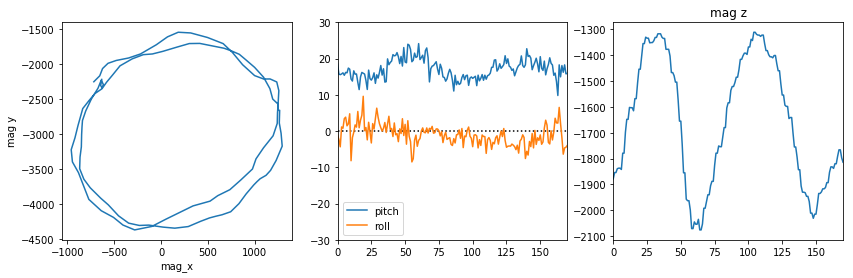

In [7]:
waltz_eastleigh = pd.read_csv('../recorded_data/calibration_level_eastleigh_2017-06-17.csv')
add_pitch_roll(waltz_eastleigh)
plot_calib_waltz(waltz_eastleigh);

From Boldrewood just outside B176 - very neat, clean circle.

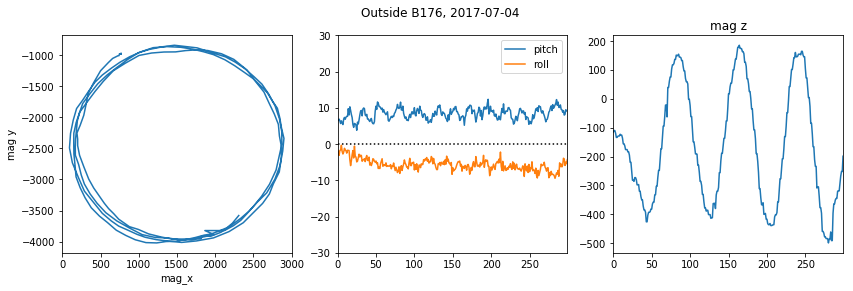

In [8]:
waltz_boldrewood_outside = pd.read_csv('../recorded_data/calibration_level_boldrewood2017-07-04T18.16.52.csv')
add_pitch_roll(waltz_boldrewood_outside)
fig, axes = plot_calib_waltz(waltz_boldrewood_outside)
fig.suptitle('Outside B176, 2017-07-04')
#fig.savefig('clean_calib.png')